<a href="https://colab.research.google.com/github/harshavardhangadila/Basic-Neural-Network-Using-Numpy-Keras-Pytorch-and-Jax/blob/main/8)_TensorFlow_Subclassed_API.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## TensorFlow Subclassed API - Neural Network

In [1]:
# Step 1: Imports
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D

In [2]:
# Step 2: Generate 3-Variable Synthetic Data
def generate_data(n_samples=1000):
    x1 = np.random.uniform(-5, 5, n_samples)
    x2 = np.random.uniform(-5, 5, n_samples)
    x3 = np.random.uniform(-5, 5, n_samples)
    y = 2 * np.sin(x1) + 0.5 * x2**2 + 0.3 * x3**3 + np.cos(x1 * x2)
    y += np.random.normal(0, 0.2, n_samples)
    X = np.column_stack([x1, x2, x3]).astype(np.float32)
    y = y.reshape(-1, 1).astype(np.float32)
    return X, y

X, y = generate_data()


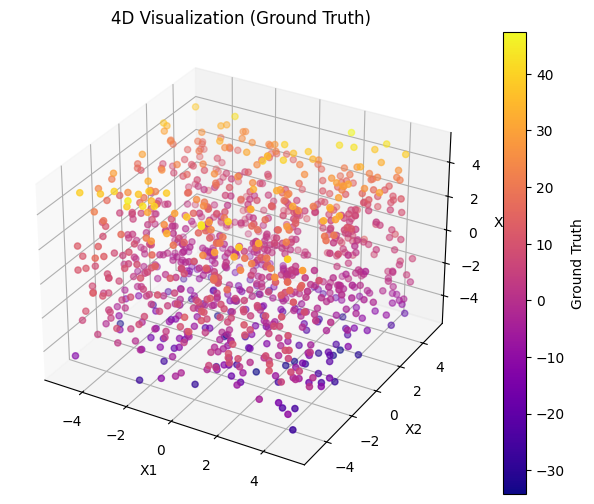

In [3]:
# Step 3: Visualize 4D Training Data
def plot_4d(X, y, label='Target'):
    fig = plt.figure(figsize=(8, 6))
    ax = fig.add_subplot(111, projection='3d')
    sc = ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=y[:, 0], cmap='plasma')
    plt.colorbar(sc, label=label)
    ax.set_xlabel("X1")
    ax.set_ylabel("X2")
    ax.set_zlabel("X3")
    ax.set_title(f"4D Visualization ({label})")
    plt.show()

plot_4d(X, y, label="Ground Truth")

In [4]:
# Step 4: Define Subclassed Model
class RegressionModel(tf.keras.Model):
    def __init__(self):
        super(RegressionModel, self).__init__()
        self.hidden1 = tf.keras.layers.Dense(64, activation='relu')
        self.hidden2 = tf.keras.layers.Dense(32, activation='relu')
        self.output_layer = tf.keras.layers.Dense(1)

    def call(self, inputs):
        x = self.hidden1(inputs)
        x = self.hidden2(x)
        return self.output_layer(x)

model = RegressionModel()

In [5]:
# Step 5: Compile and Train
model.compile(optimizer='adam', loss='mse')

# Shuffle and split manually
val_split = 0.2
val_size = int(len(X) * val_split)
X_val, y_val = X[:val_size], y[:val_size]
X_train, y_train = X[val_size:], y[val_size:]

history = model.fit(X_train, y_train, validation_data=(X_val, y_val),
                    epochs=100, batch_size=32, verbose=0)

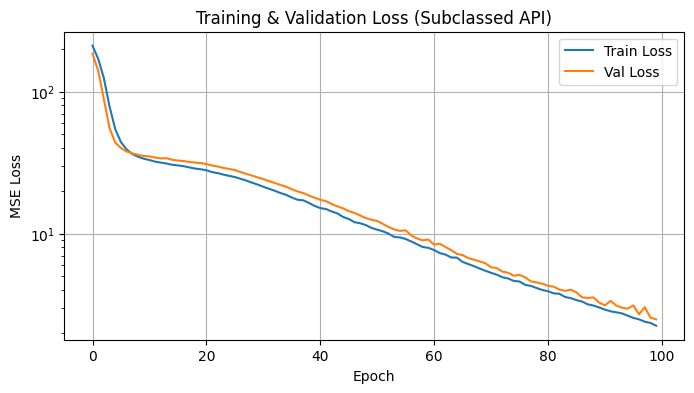

In [6]:
# Step 6: Plot Training & Validation Loss
plt.figure(figsize=(8, 4))
plt.plot(history.history['loss'], label="Train Loss")
plt.plot(history.history['val_loss'], label="Val Loss")
plt.title("Training & Validation Loss (Subclassed API)")
plt.xlabel("Epoch")
plt.ylabel("MSE Loss")
plt.yscale("log")
plt.grid(True)
plt.legend()
plt.show()


In [7]:
# Step 7: Predictions
y_pred = model.predict(X)


32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


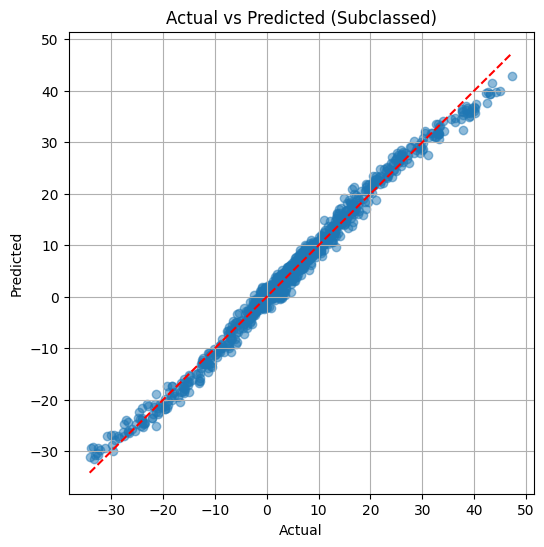

In [8]:
# Step 8: Actual vs Predicted Plot
plt.figure(figsize=(6, 6))
plt.scatter(y, y_pred, alpha=0.5)
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--')
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.title("Actual vs Predicted (Subclassed)")
plt.grid(True)
plt.show()


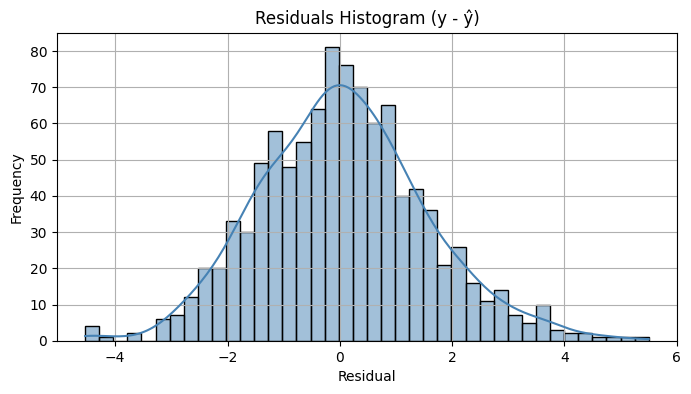

In [9]:
# Step 9: Residual Histogram
residuals = (y - y_pred).flatten()
plt.figure(figsize=(8, 4))
sns.histplot(residuals, bins=40, kde=True, color='steelblue')
plt.title("Residuals Histogram (y - ŷ)")
plt.xlabel("Residual")
plt.ylabel("Frequency")
plt.grid(True)
plt.show()

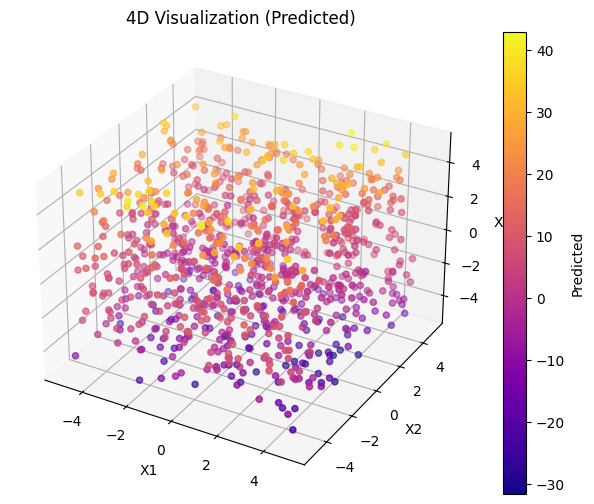

In [10]:
# Step 10: 4D Prediction Visualization
plot_4d(X, y_pred, label="Predicted")


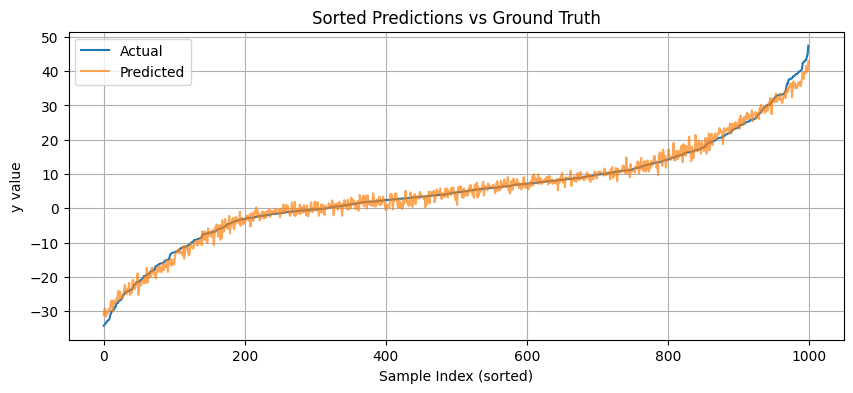

In [11]:
# Step 11: Sorted Predictions vs True Plot
sorted_idx = np.argsort(y[:, 0])
plt.figure(figsize=(10, 4))
plt.plot(y[sorted_idx], label="Actual")
plt.plot(y_pred[sorted_idx], label="Predicted", alpha=0.7)
plt.title("Sorted Predictions vs Ground Truth")
plt.xlabel("Sample Index (sorted)")
plt.ylabel("y value")
plt.legend()
plt.grid(True)
plt.show()

In [12]:
# Step 12: Predict on Custom Inputs
def predict_custom(model, x1, x2, x3):
    inp = tf.convert_to_tensor([[x1, x2, x3]], dtype=tf.float32)
    return model(inp).numpy()[0][0]

test_points = [(-4, -4, -4), (0, 0, 0), (4, 4, 4)]
print("\nCustom Test Predictions:")
for x1, x2, x3 in test_points:
    pred = predict_custom(model, x1, x2, x3)
    actual = 2 * np.sin(x1) + 0.5 * x2**2 + 0.3 * x3**3 + np.cos(x1 * x2)
    print(f"Input: ({x1}, {x2}, {x3}) → Prediction: {pred:.3f}, Actual: {actual:.3f}")


Custom Test Predictions:
Input: (-4, -4, -4) → Prediction: -12.198, Actual: -10.644
Input: (0, 0, 0) → Prediction: -1.103, Actual: 1.000
Input: (4, 4, 4) → Prediction: 25.580, Actual: 24.729
